# Defining the fundamental zone

> **Goal**: The fundamental zone is the minimum amount of orientation space required to describe all possible crystal orientations (contents all but only unique orientation descriptions).

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import ftir_funct as f

module FTIR v.2024.2.19 imported


In [2]:
# generate values to plot the reference envelope when required
polar, azimuths = f.regular_S2_grid(n_squared=100)
T = f.Tvalues(trans=(90, 50, 20), azimuth=azimuths, polar=polar)
x, y, z = f.sph2cart(T, azimuths, polar)

# normalize colors for T values to max and min values
Tmax, Tmin = T.max(), T.min()
Tcolors = (T - Tmin) / (Tmax - Tmin)

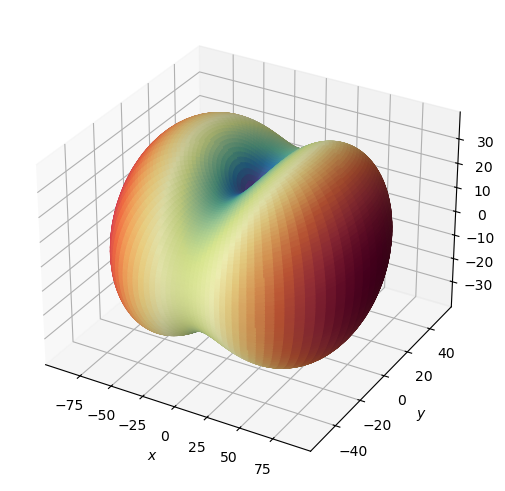

In [4]:
# make plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

Let's rotate the envelope using Euler angles (Bunge convention, intrinsic rotation). In the Bunge Euler angle convention, an arbitrary rotation is determined by three consecutive rotations in the sample reference frame. The first is about the z-axis, the second about the x-axis, and the third again about the z-axis.

> _Intrinsic rotations_ means that these Euler angles describe the rotations that are needed to align the crystal/object with a reference frame where the symmetry elements of the crystal are in a fixed position.

In [5]:
# rotate the envelope using Euler angles (Bunge convention, intrinsic rotation)
rot_x, rot_y, rot_z = f.rotate(coordinates=(x, y, z), euler_ang=(30, 45, 60))

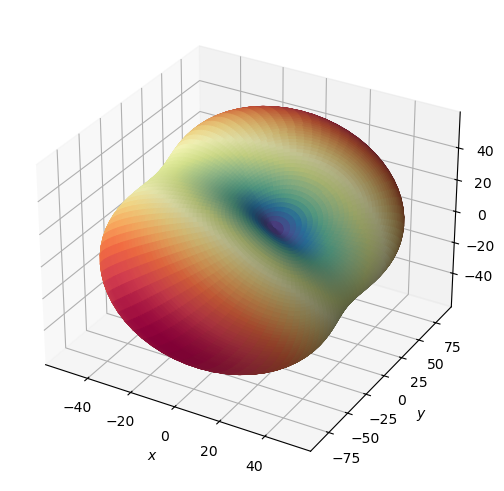

In [7]:
# check making a plot
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
ax.plot_surface(rot_x, rot_y, rot_z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

The transmitance envelope has an orthorhombic 222 symmetry. In the Bunge convention and for intrinsic rotations, the fundamental zone in Euler space ($\varphi_{1}, \Phi, \varphi_{2}$) or ``ZXZ`` is as follows

$0^{\circ} \leq \varphi_{1} \leq 90^{\circ}$    
$0^{\circ} \leq \Phi \leq 90^{\circ}$  
$0^{\circ} \leq \varphi_{3} \leq 180^{\circ}$

> Source: https://www.researchgate.net/profile/Gert-Nolze/publication/261217017_Euler_angles_and_symmetry/links/00b7d535365d0590c6000000/Euler-angles-and-symmetry.pdf

Let's check this:

In [10]:
# rotations around phi 1 (Z)
ref = f.rotate(coordinates=(x, y, z), euler_ang=(0, 0, 0))
rotation_0 = f.rotate(coordinates=(x, y, z), euler_ang=(45, 0, 0))
rotation_1 = f.rotate(coordinates=(x, y, z), euler_ang=(90, 0, 0))
# rotations around Phi (X)
rotation_2 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 45, 0))
rotation_3 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 90, 0))
# combined rotations
rotation_4 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 45, 180))
rotation_5 = f.rotate(coordinates=(x, y, z), euler_ang=(90, 90, 0))
rotation_6 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 90, 90))
rotation_7 = f.rotate(coordinates=(x, y, z), euler_ang=(75, 90, 20))

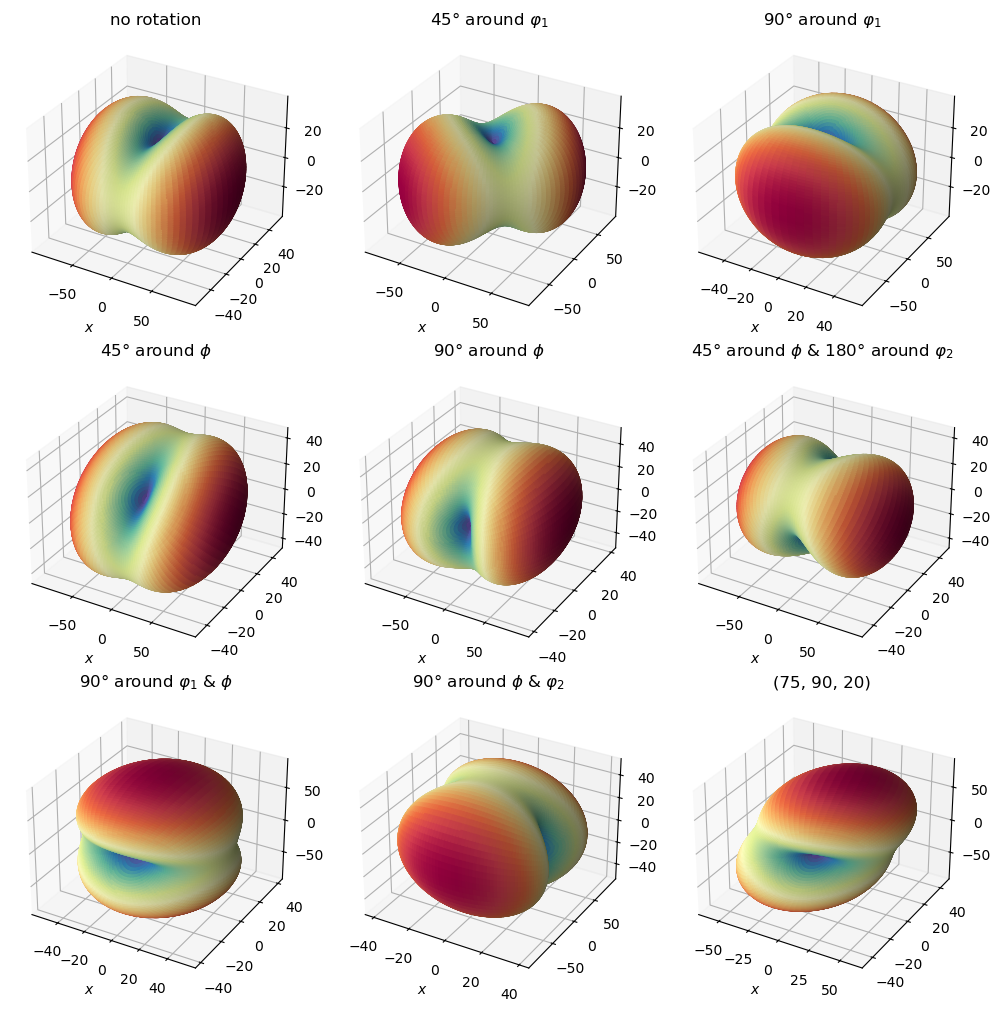

In [14]:
titles = [r'no rotation',
          r'45° around $\varphi_{1}$',
          r'90° around $\varphi_{1}$',
          r'45° around $\phi$',
          r'90° around $\phi$',
          r'45° around $\phi$ & 180° around $\varphi_{2}$',
          r'90° around $\varphi_{1}$ & $\Phi$',
          r'90° around $\phi$ & $\varphi_{2}$',
          r'(75, 90, 20)']

envelopes = [ref, rotation_0, rotation_1, rotation_2, rotation_3, rotation_4,
             rotation_5, rotation_6, rotation_7]

# make plot
fig, axes = plt.subplots(subplot_kw={"projection": "3d"}, ncols=3, nrows=3, figsize=(10, 10), constrained_layout=True)

for index, ax in enumerate(axes.flat):
    x, y, z = envelopes[index]
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
    ax.set_xlabel(r'$x$')
    ax.set_title(titles[index])

Due to the symmetry of the envelope and the existence of a fundamental zone, there are equivalent orientations, i.e. the crystal orientation can be described by different but symmetry-equivalent sets of Euler angles. This number of equivalent orientations depends on the symmetry. In particular, if one uses the ``symmetrise()`` function in MTEX there are 8 equivalent Euler angles that defines the same orientation.

```matlab
cs = crystalSymmetry('mmm', [4.8 10 6], 'mineral', 'Forsterite');
ori = orientation.byEuler(75*degree, 90*degree, 20*degree, cs)
symmetrise(ori)
```

```reStructuredText
ans = orientation (Forsterite → xyz)
  size: 8 x 1
 
  Bunge Euler angles in degree
  phi1  Phi phi2 Inv.
    75   90   20    0
   255   90  160    0
    75   90  200    0
   255   90  340    0
    75   90   20    1
   255   90  160    1
    75   90  200    1
   255   90  340    1
```

So for the original orientation (75, 90, 20) the equivalent orientations are calculated as follows:

- (255, 90, 160): This is obtained by rotating the original orientation by 180 degrees about the $\Phi$ axis.
- (75, 90, 200): This is obtained by rotating the original orientation by 180 degrees about the $\varphi_{2}$ axis.
- (255, 90, 340): This is obtained by rotating the original orientation by 180 degrees about both the $\Phi$ and $\varphi_{2}$ axes.
- The next four orientations are the inverses of the above four orientations. Inversion is another symmetry operation, which changes the sign of the orientation.

So that for example for a (270, 150, 20) will be:

```reStructuredText
  phi1  Phi phi2 Inv.
   270  150   20    0
    90   30  160    0
   270  150  200    0
    90   30  340    0
   270  150   20    1
    90   30  160    1
   270  150  200    1
    90   30  340    1
```